# Attatched is an analysis of FNG and Bitcoin data 

In [1]:
import numpy as np
import pandas as pd
import quandl
import requests
import os 
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import quandl

import plotly.express as px
import plotly.graph_objects as go
import plotly
import seaborn as sns
import panel as pn

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project /Deep-Learning-main/Starter_Code/Data/btc_sentiment_data (1).txt', infer_datetime_format=True)
df.columns = ['date','fng_value','classification']
df = df.set_index('date')
df = df.drop(['classification'], axis = 1)
df = df[::-1]
df = df.dropna()
df.head()

,fng_value
date,
02-01-2018,30.0
02-02-2018,15.0
02-03-2018,40.0
02-04-2018,24.0
02-05-2018,11.0


In [3]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['fng_value'], mode='lines', name='FNG Value'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "FNG Value",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [4]:
# Load the historical closing prices for Bitcoin
df2 = pd.read_csv('/content/drive/MyDrive/Deep Learning Project /Deep-Learning-main/Starter_Code/Data/BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df2 = df2[['Close']].dropna()
df2 = df2[::-1]
# df2.columns = ['Close']
df2

,Close
Date,
2021-06-02,37575.179688
2021-06-01,36684.925781
2021-05-31,37332.855469
2021-05-30,35678.128906
2021-05-29,34616.066406
...,...
2014-09-21,398.821014
2014-09-20,408.903992
2014-09-19,394.795990


In [5]:
# Join the data into a single DataFrame
df = df.join(df2, how="inner")
df.sort_index(inplace=True)
df.head()

,fng_value,Close
2018-02-01,30.0,9170.540039
2018-02-02,15.0,8830.750000
2018-02-03,40.0,9174.910156
2018-02-04,24.0,8277.009766
2018-02-05,11.0,6955.270020


In [6]:
#Plot Institutional Confidence with trend line to show declince over time 
fig1 = px.scatter(df['fng_value'], x=df.index, y="fng_value", trendline='ols', title='FNG Trendline',width=1200, height=600)
fig1.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig1.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



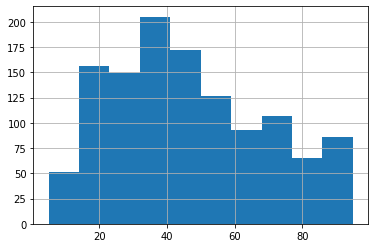

In [7]:
df['fng_value'].hist()

In [8]:
df_moving_average = df.copy()

In [9]:
df_moving_average['SMA 20'] = df_moving_average['Close'].rolling(window = 20).mean().dropna()
df_moving_average['SMA 50'] = df_moving_average['Close'].rolling(window = 50).mean().dropna()
df_moving_average['SMA 200'] = df_moving_average['Close'].rolling(window = 200).mean().dropna()

In [10]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_moving_average.index, y=df_moving_average['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df_moving_average.index, y=df_moving_average['SMA 20'], mode='lines', name='20 Day Moving Average'))
fig.add_trace(go.Scatter(x=df_moving_average.index, y=df_moving_average['SMA 50'], mode='lines', name='50 Day Moving Average'))
fig.add_trace(go.Scatter(x=df_moving_average.index, y=df_moving_average['SMA 200'], mode='lines', name='200 Day Moving Average'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Moving Averages",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# Set x-axis title
fig.update_xaxes(title_text="Date")
# Set y-axes titles
fig.update_yaxes(title_text="Price")

fig.add_annotation(x='2021-04-14', y='64000',
         text="Coinbase Goes Public",
            showarrow=True,
           arrowhead=1)

fig.add_annotation(x='2021-05-18', y='55000',
         text="China Crackdown",
            showarrow=True,
           arrowhead=1)

fig.add_annotation(x='2021-02-08', y='58000',
         text="Tesla / Bitcoin",
            showarrow=True,
           arrowhead=1)

fig.add_annotation(x='2020-08-11', y='12000',
         text="Microstrategy / Bitcoin",
            showarrow=True,
           arrowhead=1)

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show() 

In [11]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2.index, y=df2['Close'], mode='lines', name='Bitcoin Price'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [12]:
df['ratio fng'] = df['Close'] / df['fng_value']

In [13]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['ratio fng'], mode='lines', name='Bitcoin Close Divided by Fear and Greed'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Close Divided by Fear and Greed",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [14]:
cpi = pd.read_csv("/content/drive/MyDrive/Deep Learning Project /Deep-Learning-main/Starter_Code/Data/CPI.csv")
cpi = cpi.set_index('DATE')

In [15]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=cpi.index, y=cpi['CPIAUCSL'], mode='lines', name='CPI'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Consumer Price Index",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [16]:
cpi.head()

,CPIAUCSL
DATE,
2017-01-01,243.620
2017-02-01,243.872
2017-03-01,243.766
2017-04-01,244.274
2017-05-01,244.069


In [17]:
cpi_percent = cpi.pct_change()
cpi_percent = (1+cpi_percent).cumprod() -1
cpi_percent.tail(1) *100

,CPIAUCSL
DATE,
2021-04-01,9.527953


In [18]:
# Join the data into a single DataFrame
df = df.join(cpi, how="inner")
df.sort_index(inplace=True)

In [19]:
df['cpi ratio'] = df['Close'] / df['CPIAUCSL']

In [20]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['cpi ratio'], mode='lines', name='Bitcoin Close Divided by Consumer Price Index'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Close Divided by Consumer Price Index",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [27]:
# Load the historical closing prices for Bitcoin
df2_vol = pd.read_csv('/content/drive/MyDrive/Deep Learning Project /Deep-Learning-main/Starter_Code/Data/BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df2_vol = df2_vol[['Close','Volume']].dropna()
df2_vol = df2_vol[::-1]
# df2.columns = ['Close']
df2_vol

,Close,Volume
Date,,
2021-06-02,37575.179688,3.307087e+10
2021-06-01,36684.925781,3.463942e+10
2021-05-31,37332.855469,3.900985e+10
2021-05-30,35678.128906,3.164608e+10
2021-05-29,34616.066406,4.523101e+10
...,...,...
2014-09-21,398.821014,2.658010e+07
2014-09-20,408.903992,3.686360e+07
2014-09-19,394.795990,3.791970e+07


In [30]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2_vol.index, y=df2_vol['Volume'], mode='lines', name='Bitcoin Volume'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Volume",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [39]:
# Plot raw index values 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2_vol.index, y=df2_vol['Close'], mode='lines', name='Bitcoin Volume'))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='LightSteelBlue')
fig.update_layout(width=1300, height=600)
fig.update_layout(
    title={
        'text': "Bitcoin Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
        buttons=list([
            dict(count=12, label="12y", step="year", stepmode="backward"),
            dict(count=6, label="6y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [38]:
vol_cor = df2_vol.corr()
vol_cor

,Close,Volume
Close,1.000000,0.798497
Volume,0.798497,1.000000


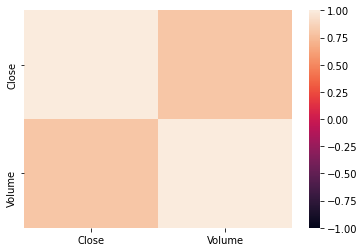

In [37]:
import seaborn as sns
sns.heatmap(vol_cor,vmin=-1,vmax=1)